# Import things

In [7]:
import pca # explain, apply, visualize
import decision_tree # DecisionTree
import neural_network # NeuralNetwork
import naive_bayes # NaiveBayes
import support_vector_machine # SVM
import clustering # Cluster
import dataframe_adapter # DataFrameAdapter
import model_data_adapter # ModelDataAdapter
# import natural_language_adapter # NaturalLanguageAdapter
import pandas

# Open dataset

In [8]:
dataset = pandas.read_csv("dataset.csv")

# Explain with PCA

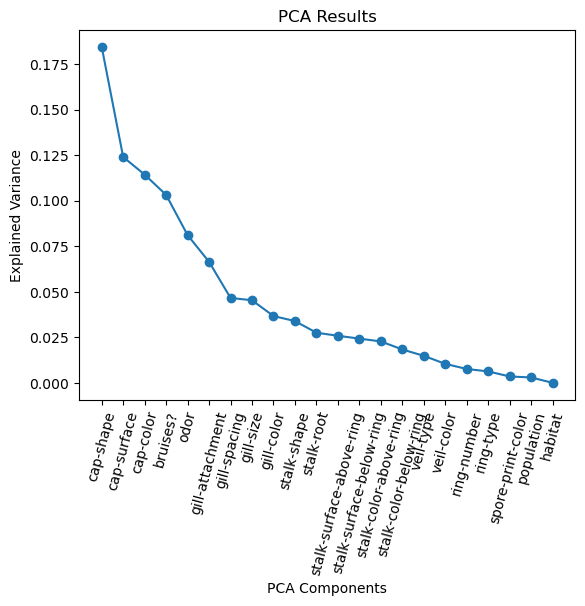

In [9]:
scaled_data = dataframe_adapter.DataFrameAdapter(dataset).skip(["class"]).with_categoricals().only_numericals().scale().ok()
pca.explain(scaled_data)

# Select PCA Components

In [10]:
components, data, explained_variance, most_important_features = pca.apply(scaled_data)
print("explained variance = %s%%" % (explained_variance.round(3) * 100))
print("number of selected features = %s" % len(most_important_features))
print("most important features = %s" % most_important_features)

explained variance = 83.6%
number of selected features = 9
most important features = ['cap-shape', 'cap-surface', 'gill-attachment', 'stalk-surface-above-ring', 'ring-type', 'stalk-color-above-ring', 'stalk-surface-below-ring', 'habitat', 'ring-number']


# Compose datasets

In [11]:
all_trainset, all_testset = model_data_adapter.ModelDataAdapter(dataset).split('class')
modified_dataset = dataframe_adapter.DataFrameAdapter(dataset).only(most_important_features + ['class']).ok()
pca_trainset, pca_testset = model_data_adapter.ModelDataAdapter(modified_dataset).split('class')

# Visualize PCA Components

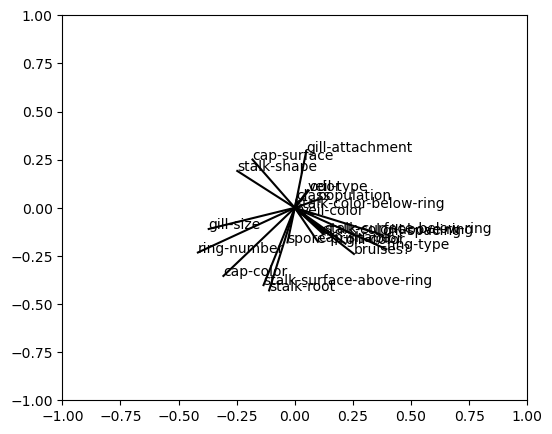

In [5]:
pca.visualize(components, dataset)

# Using a Decision Tree on all Dataset

In [7]:
tree = decision_tree.DecisionTree()
tree.fit(all_trainset)
tree.plot()
cm, acc = tree.evaluate(all_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 100.0


# Selecting features with PCA

In [12]:
tree = decision_tree.DecisionTree()
tree.fit(pca_trainset)
tree.plot()
cm, acc = tree.evaluate(pca_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 96.8


# Using a Neural Network instead

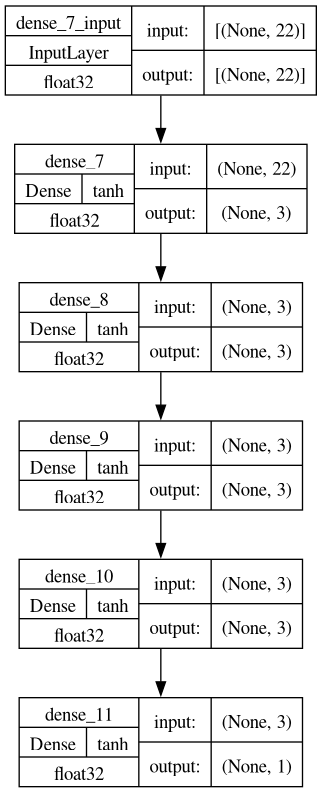

In [12]:
nn = neural_network.NeuralNetwork((len(all_trainset['x'].columns),), (3,3,3,3), (len(all_trainset['y'].columns),))
nn.plot()

In [13]:
nn.fit(all_trainset)
loss, acc = nn.evaluate(all_testset)
print("accuracy = %s" % (acc.round(3) * 100))

Epoch 1/10
1138/1138 [==============================] - 2s 2ms/step - loss: 0.9835 - accuracy: 0.7320
Epoch 2/10
1138/1138 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8711
Epoch 3/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.3134 - accuracy: 0.8936
Epoch 4/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.9068
Epoch 5/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.2416 - accuracy: 0.9202
Epoch 6/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.2248 - accuracy: 0.9300
Epoch 7/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.9335
Epoch 8/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.2023 - accuracy: 0.9409
Epoch 9/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.1983 - accuracy: 0.9434
Epoch 10/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.195

# Again exploiting PCA 

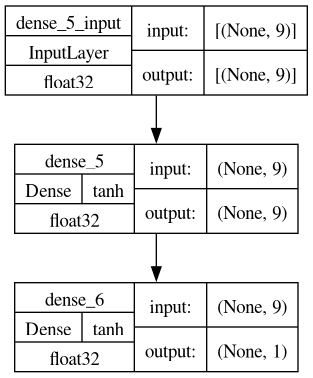

In [10]:
nn = neural_network.NeuralNetwork((len(pca_trainset['x'].columns),), (9,), (len(pca_trainset['y'].columns),))
nn.plot()

In [11]:
nn.fit(pca_trainset)
loss, acc = nn.evaluate(pca_testset)
print("accuracy = %s" % (acc.round(3) * 100))

Epoch 1/10
1138/1138 [==============================] - 2s 1ms/step - loss: 1.0875 - accuracy: 0.6622
Epoch 2/10
1138/1138 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7677
Epoch 3/10
1138/1138 [==============================] - 1s 1ms/step - loss: 0.4652 - accuracy: 0.7983
Epoch 4/10
1138/1138 [==============================] - 1s 1ms/step - loss: 0.4263 - accuracy: 0.8227
Epoch 5/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8514
Epoch 6/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8834
Epoch 7/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.8910
Epoch 8/10
1138/1138 [==============================] - 2s 1ms/step - loss: 0.3152 - accuracy: 0.9020
Epoch 9/10
1138/1138 [==============================] - 1s 1ms/step - loss: 0.2854 - accuracy: 0.9040
Epoch 10/10
1138/1138 [==============================] - 1s 1ms/step - loss: 0.279

# Using Naive Bayes

In [6]:
nb = naive_bayes.NaiveBayes(naive_bayes.Probability.Gaussian)
nb.fit(all_trainset)
cm, acc = nb.evaluate(all_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 92.9


/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Using NB with PCA Data

In [11]:
nb = naive_bayes.NaiveBayes(naive_bayes.Probability.Gaussian)
nb.fit(pca_trainset)
cm, acc = nb.evaluate(pca_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 77.3


/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Classifier

In [ ]:
svm = support_vector_machine.SVM(support_vector_machine.Kernel.Linear, 1000000)
svm.fit(all_trainset)
cm, acc = svm.evaluate(all_testset)
print("accuracy = %s" % (acc.round(3) * 100))

# Support Vector Classifier with PCA

In [ ]:
svm = support_vector_machine.SVM(support_vector_machine.Kernel.Linear, 1000000)
svm.fit(pca_trainset)
cm, acc = svm.evaluate(pca_testset)
print("accuracy = %s" % (acc.round(3) * 100))

# Clustering Classifier

In [13]:
svm = clustering.Clustering(clustering.Clustering.number_of_clusters(all_trainset['y'], 'class'), clustering.Strategy.Lloyd)
svm.fit(all_trainset)
cm, acc = svm.evaluate(all_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 70.8


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Clustering Classifier with PCA

In [14]:
svm = clustering.Clustering(clustering.Clustering.number_of_clusters(pca_trainset['y'], 'class'), clustering.Strategy.Lloyd)
svm.fit(pca_trainset)
cm, acc = svm.evaluate(pca_testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 35.099999999999994


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
